In [20]:
# Read Fashion MNIST dataset
%matplotlib inline
import seaborn as sn
import pandas as pd
import numpy as np
import util_mnist_reader as mnist_reader
import matplotlib.pyplot as plt
X_train, y_train = mnist_reader.load_mnist('data/fashion', kind='train')
X_test, y_test = mnist_reader.load_mnist('data/fashion', kind='t10k')

# Your code goes here . . .

Splitting train data 8:2 train:validation using sklearn

In [21]:
from sklearn.model_selection import train_test_split 
X_train, X_valid, y_train, y_valid = train_test_split( 
    X_train, y_train, test_size = 0.20, random_state = 42) 

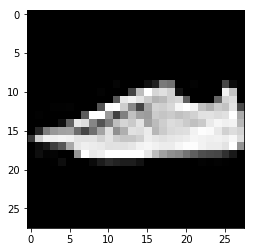

In [22]:
plt.imshow(X_train[0].reshape((28, 28)), cmap = 'gray')

Changing format of y values

Eg:- original=5 

new=[0,0,0,0,0,1,0,0,0,0]

In [23]:
Y_train=np.zeros((y_train.shape[0],10))
for i in range(0,Y_train.shape[0]):
    for j in range(0,Y_train.shape[1]):
        if(y_train[i]==j):
            Y_train[i][j]=1
        else:
            Y_train[i][j]=0

In [24]:
Y_test=np.zeros((y_test.shape[0],10))
for i in range(0,Y_test.shape[0]):
    for j in range(0,Y_test.shape[1]):
        if(y_test[i]==j):
            Y_test[i][j]=1
        else:
            Y_test[i][j]=0

In [6]:
Y_valid=np.zeros((y_valid.shape[0],10))
for i in range(0,Y_valid.shape[0]):
    for j in range(0,Y_valid.shape[1]):
        if(y_valid[i]==j):
            Y_valid[i][j]=1
        else:
            Y_valid[i][j]=0

In [7]:
def loss_function_1(true,pred):
    number_samples = true.shape[0]
    log_predictions= - np.log(pred[np.arange(number_samples), true.argmax(axis=1)])
    cross_loss= np.sum(log_predictions)/number_samples
    return cross_loss

In [8]:
def sigmoid(s):
    return 1/(1 + np.exp(-s))

In [9]:
def sigmoid_derv(s):
    return s * (1 - s)

In [10]:
def softmax(s):
    exps = np.exp(s - np.max(s, axis=1, keepdims=True))
    return exps/np.sum(exps, axis=1, keepdims=True)

In [11]:
training_loss_list = []
validation_loss_list=[]

In [12]:
class  Neural_Netwrk:
    def __init__(self, x, y, x_valid , y_valid):
        self.x = x
        self.y = y
        
        self.x_valid=x_valid
        self.y_valid=y_valid
        
        self.learning_rate=0.3
        neurons_in_layer1=100
        
        self.weight_layer1=np.random.randn((self.x).shape[1],neurons_in_layer1)
        self.bias_layer1 = np.zeros((1,neurons_in_layer1))
        
        self.weight_layer2=np.random.randn(neurons_in_layer1,10)
        self.bias_layer2 = np.zeros((1, 10))
        
    def test(self, data):
        self.x = data
        self.forward_prop()
        return self.a2
        
    def forward_prop(self):
        z1=np.dot(self.x,self.weight_layer1) + self.bias_layer1
        self.a1=sigmoid(z1)
        z2=np.dot(self.a1,self.weight_layer2) + self.bias_layer2
        self.a2=softmax(z2)
        
        
    def back_prop(self):
        loss=loss_function_1(self.y,self.a2)
        print("Training Loss = ",loss)
        training_loss_list.append(loss)
        loss2=loss_function_1(self.y_valid,self.a2)
        print("Validation Loss = ",loss2)
        validation_loss_list.append(loss2)
        print("####################")

        a2_delta = self.a2-self.y
        a2_delta = a2_delta/(self.y).shape[0]
        z1_delta = np.dot(a2_delta, self.weight_layer2.T)
        a1_delta = z1_delta * sigmoid_derv(self.a1) # w1

        self.weight_layer2 -= self.learning_rate * np.dot(self.a1.T, a2_delta)
        self.bias_layer2 -= self.learning_rate * np.sum(a2_delta, axis=0)
        self.weight_layer1 -= self.learning_rate * np.dot(self.x.T, a1_delta)
        self.bias_layer1 -= self.learning_rate * np.sum(a1_delta, axis=0)
        
        
        
model = Neural_Netwrk(X_train/256.0, Y_train, X_valid/256.0, Y_valid)

In [13]:
Epochs=100
for i in range(Epochs):
    print("Epoch ",i+1)
    model.forward_prop()
    model.back_prop()

Epoch  1
Training Loss =  7.849326157520757
Validation Loss =  7.97897803717563
####################
Epoch  2
Training Loss =  5.6044039435951
Validation Loss =  6.09292625689101
####################
Epoch  3
Training Loss =  4.860136363636874
Validation Loss =  5.740461861348037
####################
Epoch  4
Training Loss =  4.402310750601625
Validation Loss =  5.599031962888961
####################
Epoch  5
Training Loss =  4.047220786955137
Validation Loss =  5.527470716877147
####################
Epoch  6
Training Loss =  3.748690801034315
Validation Loss =  5.488743370812675
####################
Epoch  7
Training Loss =  3.4913074663765955
Validation Loss =  5.470499882445028
####################
Epoch  8
Training Loss =  3.268501713537907
Validation Loss =  5.466984148377869
####################
Epoch  9
Training Loss =  3.0761591720956596
Validation Loss =  5.474838656619271
####################
Epoch  10
Training Loss =  2.910455863945689
Validation Loss =  5.491323321149636
##

Training Loss =  1.1471038635030126
Validation Loss =  6.570097648744209
####################
Epoch  82
Training Loss =  1.1423799981271916
Validation Loss =  6.576289515353609
####################
Epoch  83
Training Loss =  1.1377487006728768
Validation Loss =  6.5823872368333385
####################
Epoch  84
Training Loss =  1.1332069745202233
Validation Loss =  6.588393054082475
####################
Epoch  85
Training Loss =  1.128751948361444
Validation Loss =  6.594309087427257
####################
Epoch  86
Training Loss =  1.1243808704210978
Validation Loss =  6.600137348553749
####################
Epoch  87
Training Loss =  1.1200911029655212
Validation Loss =  6.605879751615577
####################
Epoch  88
Training Loss =  1.1158801170708832
Validation Loss =  6.611538123454506
####################
Epoch  89
Training Loss =  1.1117454876271464
Validation Loss =  6.617114212906871
####################
Epoch  90
Training Loss =  1.1076848885609347
Validation Loss =  6.6226096

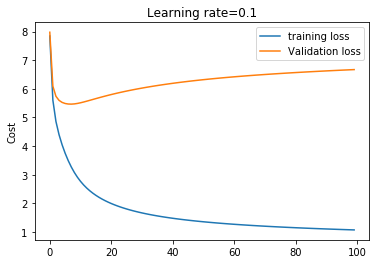

In [14]:
plt.plot(training_loss_list,label="training loss") 
plt.plot(validation_loss_list,label="Validation loss") 
plt.legend(loc='upper right')
plt.ylabel("Cost") 
plt.title("Learning rate=0.1")
plt.show()

In [15]:
predictions=model.test(X_test/256)
y_predict_non_category = [ np.argmax(t) for t in predictions ]

In [16]:
from sklearn.metrics import confusion_matrix
y_test_non_category = [ np.argmax(t) for t in Y_test ]
y_predict_non_category = [ np.argmax(t) for t in predictions ]

In [17]:
conf_mat = confusion_matrix(y_test_non_category, y_predict_non_category)

In [18]:
conf_mat

array([[658,  19,  56, 113,  25,  13, 101,   3,  12,   0],
       [ 21, 869,  12,  50,   7,   1,  32,   2,   6,   0],
       [ 33,   7, 432,  12, 280,   9, 189,   2,  34,   2],
       [ 71,  55,  23, 707,  48,   5,  74,   3,  10,   4],
       [ 18,  11, 234,  44, 497,  10, 164,   0,  22,   0],
       [ 22,   4,   7,  11,   3, 595,   7, 174,  62, 115],
       [191,  12, 152,  50, 220,  10, 302,   3,  59,   1],
       [  0,   0,   0,   0,   0, 116,   0, 764,  20, 100],
       [ 16,   8,  28,  22,   9,  46,  38,  29, 782,  22],
       [  3,   0,   0,   5,   0,  79,   0,  78,  20, 815]], dtype=int64)

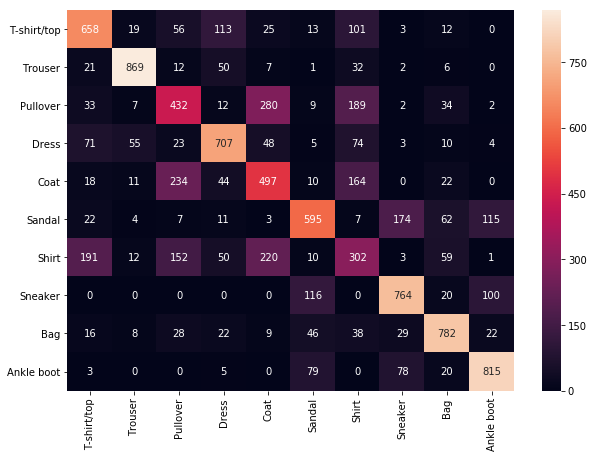

In [19]:
type_of_fashion=["T-shirt/top","Trouser","Pullover","Dress","Coat","Sandal","Shirt","Sneaker","Bag","Ankle boot"]
df_cm = pd.DataFrame(conf_mat, index = [i for i in type_of_fashion],
                  columns = [i for i in type_of_fashion])
plt.figure(figsize = (10,7))
sn.heatmap(df_cm, annot=True, fmt='g')

In [20]:
TruePositive = np.diag(conf_mat)
TP=np.sum(TruePositive)
FalsePositive = []
for i in range(10):
    FalsePositive.append(sum(conf_mat[:,i]) - conf_mat[i,i])
FalsePositive=np.array(FalsePositive)
FP=np.sum(FalsePositive)
FalseNegative = []
for i in range(10):
    FalseNegative.append(sum(conf_mat[i,:]) - conf_mat[i,i])
FalseNegative=np.array(FalseNegative)
FN=np.sum(FalseNegative)
TrueNegative = []
for i in range(10):
    temp = np.delete(conf_mat, i, 0)
    temp = np.delete(temp, i, 1)
    TrueNegative.append(sum(sum(temp)))
TrueNegative=np.array(TrueNegative)
TN=np.sum(TrueNegative)

In [21]:
Accuracy=(TP)/len(X_test)
print("ACCUARACY=", Accuracy*100,"%")

ACCUARACY= 64.21 %


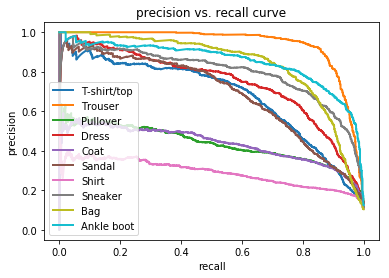

In [43]:
# precision recall curve
from sklearn.metrics import precision_recall_curve, roc_curve
precision = dict()
recall = dict()
for i in range(10):
    precision[i], recall[i], _ = precision_recall_curve(Y_test[:, i],
                                                        predictions[:, i])
    plt.plot(recall[i], precision[i], lw=2, label='{}'.format(type_of_fashion[i]))

plt.xlabel("recall")
plt.ylabel("precision")
plt.legend(loc="best")
plt.title("precision vs. recall curve")
plt.show()

############################################################################################################################

Keras Neural Network

__________________________________________________________________________________________________________________________

In [2]:
# Read Fashion MNIST dataset
%matplotlib inline

import numpy as np
import util_mnist_reader as mnist_reader
import matplotlib.pyplot as plt
X_train, y_train = mnist_reader.load_mnist('data/fashion', kind='train')
X_test, y_test = mnist_reader.load_mnist('data/fashion', kind='t10k')

# Your code goes here . . .

In [3]:
from tensorflow.python.client import device_lib
print(device_lib.list_local_devices())

[name: "/device:CPU:0"
device_type: "CPU"
memory_limit: 268435456
locality {
}
incarnation: 4524255998895230212
, name: "/device:GPU:0"
device_type: "GPU"
memory_limit: 3153697177
locality {
  bus_id: 1
  links {
  }
}
incarnation: 13474654443697822523
physical_device_desc: "device: 0, name: GeForce GTX 1050 Ti, pci bus id: 0000:01:00.0, compute capability: 6.1"
]


In [4]:
from keras import backend as K
K.tensorflow_backend._get_available_gpus()
import keras

In [5]:
from keras.models import Model
from keras.layers import Dense, Input, Dropout
from keras.layers.normalization import BatchNormalization
from keras.utils import to_categorical

In [27]:
def model1(x_train, y_train):
    inputs = Input(shape=(784,))
    x = Dense(256, activation='relu')(inputs)
    x = BatchNormalization()(x)
    x = Dense(128, activation='relu')(x)
    x = Dropout(0.2)(x)
    x = Dense(128, activation='relu')(x)
    x = Dense(64, activation='relu')(x)
    predictions = Dense(10, activation='softmax')(x)
    model = Model(input=inputs, output=predictions)
    model.compile(loss=keras.losses.categorical_crossentropy,
             optimizer=keras.optimizers.Adam(),
             metrics=['accuracy'])
    history = model.fit(x_train, to_categorical(y_train), epochs=40, shuffle=True, validation_split=0.20)#, batch_size=10)# steps_per_epoch=1,
                       #validation_steps=1)
    return history

keras_nn = model1(X_train/256, y_train)

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
Instructions for updating:
Use tf.cast instead.


C:\Users\admin\Anaconda3\lib\site-packages\ipykernel_launcher.py:10: UserWarning: Update your `Model` call to the Keras 2 API: `Model(inputs=Tensor("in..., outputs=Tensor("de...)`
  # Remove the CWD from sys.path while we load stuff.


Train on 48000 samples, validate on 12000 samples
Epoch 1/40
48000/48000 [==============================] - 11s 234us/step - loss: 0.5263 - acc: 0.8120 - val_loss: 0.4590 - val_acc: 0.8287
Epoch 2/40
48000/48000 [==============================] - 10s 200us/step - loss: 0.4103 - acc: 0.8500 - val_loss: 0.3845 - val_acc: 0.8582
Epoch 3/40
48000/48000 [==============================] - 10s 200us/step - loss: 0.3846 - acc: 0.8596 - val_loss: 0.4228 - val_acc: 0.8434
Epoch 4/40
48000/48000 [==============================] - 9s 191us/step - loss: 0.3625 - acc: 0.8663 - val_loss: 0.3906 - val_acc: 0.8661
Epoch 5/40
48000/48000 [==============================] - 9s 190us/step - loss: 0.3438 - acc: 0.8740 - val_loss: 0.3514 - val_acc: 0.8732
Epoch 6/40
48000/48000 [==============================] - 11s 234us/step - loss: 0.3253 - acc: 0.8799 - val_loss: 0.3389 - val_acc: 0.8761
Epoch 7/40
48000/48000 [==============================] - 12s 257us/step - loss: 0.3193 - acc: 0.8819 - val_loss: 0.33

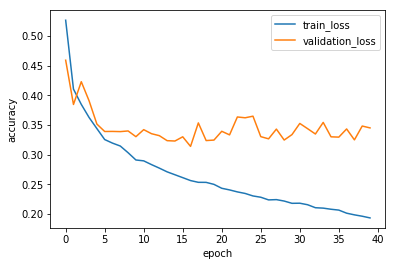

In [28]:
plt.plot(keras_nn.history['loss'])
plt.plot(keras_nn.history['val_loss'])
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train_loss', 'validation_loss'], loc='best')
plt.show()

In [29]:
x=keras_nn.model.evaluate(X_test, to_categorical(y_test))

10000/10000 [==============================] - 1s 69us/step


In [30]:
nn_predictions=keras_nn.model.predict(X_test)

In [39]:
nn_predictions

array([[0.000000e+00, 0.000000e+00, 0.000000e+00, ..., 0.000000e+00,
        0.000000e+00, 1.000000e+00],
       [0.000000e+00, 0.000000e+00, 1.000000e+00, ..., 0.000000e+00,
        0.000000e+00, 0.000000e+00],
       [0.000000e+00, 1.000000e+00, 0.000000e+00, ..., 0.000000e+00,
        0.000000e+00, 0.000000e+00],
       ...,
       [0.000000e+00, 0.000000e+00, 0.000000e+00, ..., 0.000000e+00,
        1.000000e+00, 0.000000e+00],
       [0.000000e+00, 1.000000e+00, 0.000000e+00, ..., 0.000000e+00,
        0.000000e+00, 0.000000e+00],
       [3.978593e-22, 0.000000e+00, 0.000000e+00, ..., 0.000000e+00,
        1.000000e+00, 0.000000e+00]], dtype=float32)

In [32]:
y_pred_new = [ np.argmax(t) for t in nn_predictions ]

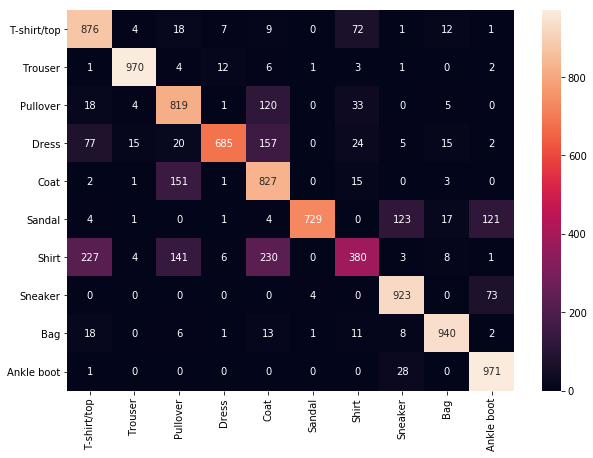

In [34]:
conf_mat2 = confusion_matrix(y_test, y_pred_new)
df_cm = pd.DataFrame(conf_mat2, index = [i for i in type_of_fashion],
                  columns = [i for i in type_of_fashion])
plt.figure(figsize = (10,7))
sn.heatmap(df_cm, annot=True, fmt='g')

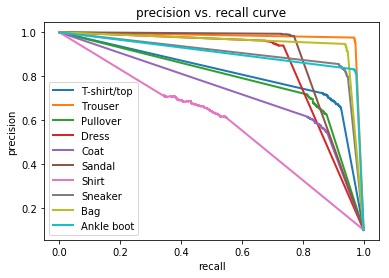

In [44]:
from sklearn.metrics import precision_recall_curve, roc_curve
precision2 = dict()
recall2 = dict()
for i in range(10):
    precision2[i], recall2[i], _ = precision_recall_curve(Y_test[:, i],
                                                        nn_predictions[:, i])
    plt.plot(recall2[i], precision2[i], lw=2, label='{}'.format(type_of_fashion[i]))

plt.xlabel("recall")
plt.ylabel("precision")
plt.legend(loc="best")
plt.title("precision vs. recall curve")
plt.show()

In [45]:
TruePositive2 = np.diag(conf_mat2)
TP2=np.sum(TruePositive2)
Accuracy2=(TP2)/len(X_test)
print("ACCUARACY=", Accuracy2*100,"%")

ACCUARACY= 81.2 %


Keras CNN

In [6]:
from keras.layers import Dense, Conv2D, MaxPooling2D, Flatten, Reshape

def cnn(x_train, y_train):
    inputs = Input(shape=(784,))
    x = Reshape((28, 28, 1))(inputs)
    x = Conv2D(32, (3,3), activation='relu', padding='same')(x)
    x = Conv2D(64, (3,3), activation='relu', padding='same', strides=2)(x)
    #x = BatchNormalization()(x)
    x = Conv2D(128, (3,3), activation='relu', strides=2, padding='same')(x)
    x = Conv2D(64, (3,3), activation='relu', strides=2)(x)
    x = Flatten()(x)
    x = BatchNormalization()(x)
    x = Dense(128, activation='relu')(x)
    x = Dropout(0.5)(x)
    predictions = Dense(10, activation='softmax')(x)
    model = Model(input=inputs, output=predictions)
    model.compile(loss=keras.losses.categorical_crossentropy,
             optimizer=keras.optimizers.Adam(),
             metrics=['accuracy'])
    history = model.fit(x_train, to_categorical(y_train), epochs=25, shuffle=True, validation_split=0.20, batch_size=10)
    return history

In [7]:
conv_history = cnn(X_train, y_train)

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
Instructions for updating:
Use tf.cast instead.


C:\Users\admin\Anaconda3\lib\site-packages\ipykernel_launcher.py:16: UserWarning: Update your `Model` call to the Keras 2 API: `Model(inputs=Tensor("in..., outputs=Tensor("de...)`
  app.launch_new_instance()


Train on 48000 samples, validate on 12000 samples
Epoch 1/25
48000/48000 [==============================] - 47s 989us/step - loss: 0.8194 - acc: 0.7019 - val_loss: 0.7317 - val_acc: 0.7300
Epoch 2/25
48000/48000 [==============================] - 47s 975us/step - loss: 0.6357 - acc: 0.7655 - val_loss: 0.6248 - val_acc: 0.7813
Epoch 3/25
48000/48000 [==============================] - 47s 977us/step - loss: 0.5423 - acc: 0.8056 - val_loss: 0.4725 - val_acc: 0.8412
Epoch 4/25
48000/48000 [==============================] - 49s 1ms/step - loss: 0.5097 - acc: 0.8178 - val_loss: 0.7499 - val_acc: 0.7651
Epoch 5/25
48000/48000 [==============================] - 45s 945us/step - loss: 0.4874 - acc: 0.8269 - val_loss: 0.4175 - val_acc: 0.8605
Epoch 6/25
48000/48000 [==============================] - 45s 932us/step - loss: 0.4577 - acc: 0.8368 - val_loss: 0.3698 - val_acc: 0.8713
Epoch 7/25
48000/48000 [==============================] - 45s 934us/step - loss: 0.4274 - acc: 0.8494 - val_loss: 0.36

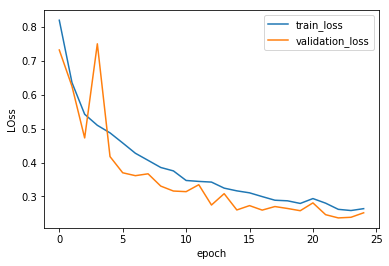

In [27]:
plt.plot(conv_history.history['loss'])
plt.plot(conv_history.history['val_loss'])
keras_cnn=conv_history
plt.ylabel('LOss')
plt.xlabel('epoch')
plt.legend(['train_loss', 'validation_loss'], loc='best')
plt.show()

In [11]:
cnn_predictions=keras_cnn.model.predict(X_test)

In [12]:
cnn_predictions

array([[8.2001361e-14, 8.4513348e-19, 1.9046850e-16, ..., 4.1831513e-06,
        1.3394256e-09, 9.9999571e-01],
       [3.2883147e-09, 2.4313665e-24, 9.9999976e-01, ..., 2.6896152e-31,
        6.4947378e-19, 8.8039554e-30],
       [3.5476535e-12, 1.0000000e+00, 6.6526435e-14, ..., 6.2785587e-20,
        1.5897804e-16, 6.2545033e-22],
       ...,
       [3.0678085e-16, 3.8162867e-25, 6.0847697e-17, ..., 4.4177296e-23,
        1.0000000e+00, 1.9114575e-21],
       [3.3765005e-13, 1.0000000e+00, 1.5791440e-14, ..., 3.9031136e-22,
        1.2934298e-15, 1.3364029e-23],
       [3.7074810e-07, 6.6487600e-11, 4.6077794e-08, ..., 7.9633757e-02,
        1.2732569e-04, 2.1752114e-03]], dtype=float32)

In [13]:
cnn_pred = [ np.argmax(t) for t in cnn_predictions ]

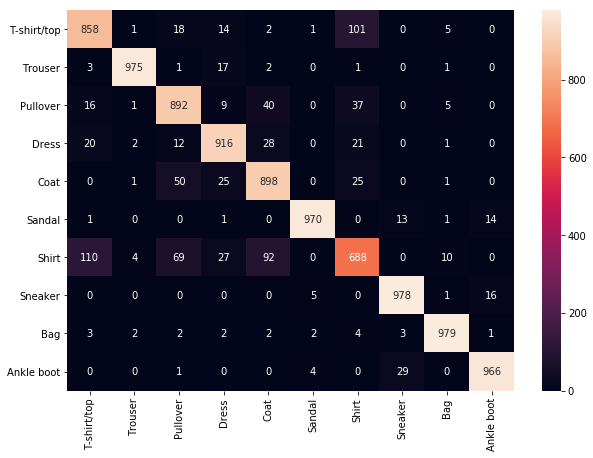

In [18]:
%matplotlib inline
import seaborn as sn
import pandas as pd
from sklearn.metrics import confusion_matrix
type_of_fashion=["T-shirt/top","Trouser","Pullover","Dress","Coat","Sandal","Shirt","Sneaker","Bag","Ankle boot"]
conf_mat3 = confusion_matrix(y_test, cnn_pred)
df_cm = pd.DataFrame(conf_mat3, index = [i for i in type_of_fashion],
                  columns = [i for i in type_of_fashion])
plt.figure(figsize = (10,7))
sn.heatmap(df_cm, annot=True, fmt='g')

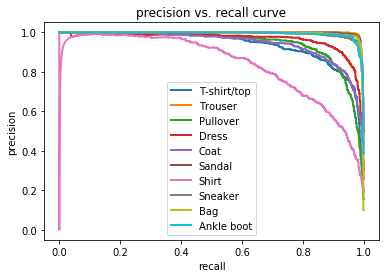

In [25]:
from sklearn.metrics import precision_recall_curve, roc_curve
precision3 = dict()
recall3 = dict()
for i in range(10):
    precision3[i], recall3[i], _ = precision_recall_curve(Y_test[:, i],
                                                        cnn_predictions[:, i])
    plt.plot(recall3[i], precision3[i], lw=2, label='{}'.format(type_of_fashion[i]))

plt.xlabel("recall")
plt.ylabel("precision")
plt.legend(loc="best")
plt.title("precision vs. recall curve")
plt.show()

In [26]:
TruePositive3 = np.diag(conf_mat3)
TP2=np.sum(TruePositive3)
Accuracy2=(TP2)/len(X_test)
print("ACCUARACY=", Accuracy2*100,"%")

ACCUARACY= 91.2 %
